# Определение перспективного тарифа для телеком-компании

# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Описание тарифов**

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    -	минута разговора: 3 рубля
    -	сообщение: 3 рубля
    -	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
    -	минута разговора: 1 рубль
    -	сообщение: 1 рубль
    -	1 Гб интернет-трафика: 150 рублей

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


## Изучение данных из файла

Для начала импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

Приступим к ознакомлению с материалами. Согласно легенде, таблица `users` содержит следующие данные:



-	user_id — уникальный идентификатор пользователя
-	first_name — имя пользователя
-	last_name — фамилия пользователя
-	age — возраст пользователя (годы)
-	reg_date — дата подключения тарифа (день, месяц, год)
-	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
-	city — город проживания пользователя
-	tarif — название тарифного плана


In [2]:
users = pd.read_csv('/datasets/users.csv')

Напишем небольшую функцию, чтобы не писать одинаковый код для каждого датасета.

In [3]:
def  head_info(df):
    display(df.head(10))
    df.info()

In [4]:
head_info(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Очевидно, что придется провести работу по смене типа данных в столбцах.

Следующая таблица `calls`:

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


In [5]:
calls = pd.read_csv('/datasets/calls.csv')

In [6]:
head_info(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


То же самое, необходима смена типа данных.


Следующая таблица `messages`:

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение


In [7]:
messages = pd.read_csv('/datasets/messages.csv')

In [8]:
head_info(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Чуть позже произведем смену типа данных.

Следующая таблица `internet`:

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя


In [9]:
internet = pd.read_csv('/datasets/internet.csv')

In [10]:
head_info(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Те же вопросы со сменой типа данных.

И последняя таблица с описанием тарифов `tariffs`:

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [11]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [12]:
head_info(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Тут все в порядке, информация корректная.

### Вывод

В целом, особых проблем по таблицам не наблюдается. Данные достаточно корректны и требуется минимальная предобработка, которой мы сейчас и займемся.

## Предобработка данных

Немного освежим в памяти вид таблицы:

In [13]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Сразу видно, что нужно поменять тип данных в столбцах `churn_date`/`reg_date` на формат даты.

Например, вот так:

In [15]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d %H:%M')

In [16]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d %H:%M')

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Теперь все корректно.

Пприступим к таблице со звонками:

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Аналогично сменим тип данных в столбце `call_date`:

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M')

In [20]:
calls['call_date']

0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

Теперь порядок. 

Посмотрим что у нас с продолжительностью звонков:

In [21]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

В соответствии с условиями тарифа, округлим все минуты вверх и перевдем в целочисленный формат:

In [22]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [23]:
calls['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

Сделано.

Теперь добавим колонку с месяцами, в который были сделаны звонки и сделаем сводную таблицу, просуммировав продолжительность и количество звонков для каждого абонента в каждом месяце согласно заданию:

In [24]:
calls['month'] = calls['call_date'].dt.month  # добавление колонки

In [25]:
total_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum','id':'count' }).reset_index()

In [26]:
total_calls = total_calls.rename(columns={'duration':'month_duration', 'id':'month_calls'})  # переименуем столбец, чтобы было понятнее

In [27]:
total_calls 

,user_id,month,month_duration,month_calls
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


Поработаем с таблицей `messages`, тут тоже надо сменить тип данных:

In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d %H:%M')  # меняем тип данных в колонке

In [30]:
messages['message_date']

0        2018-06-27
1        2018-10-08
2        2018-08-04
3        2018-06-16
4        2018-12-05
            ...    
123031   2018-12-12
123032   2018-09-28
123033   2018-09-27
123034   2018-11-15
123035   2018-11-16
Name: message_date, Length: 123036, dtype: datetime64[ns]

И так же добавляем стобец с месяцем и считаем, сколько сообщений абоненты отправляли каждый месяц:

In [31]:
messages['month'] = messages['message_date'].dt.month

In [32]:
total_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()

In [33]:
total_messages = total_messages.rename(columns={'id':'month_messages'})  # переименуем чтобы не было путаницы

In [34]:
total_messages.head(5)  # проверка

,user_id,month,month_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посмотрим, что происходит с таблицей `internet`. 

In [35]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Уберем столбец `Unnamed: 0`, так как он нам не нужен в дальнейшем, а в легенде про него ничег оне сказано.

In [36]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [37]:
internet.head()  # проверка

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Меняем тип данных в столбце с датой:

In [38]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d %H:%M')

И добавляем столбец с месяцем.

In [39]:
internet['month'] = internet['session_date'].dt.month

Делаем сводную таблицу и переименовываем столбец со значениями трафика:

In [40]:
total_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

In [41]:
total_internet = total_internet.rename(columns={'mb_used':'total_gb_used'})

In [42]:
total_internet

,user_id,month,total_gb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


По заданию округляем использование трафика вверх и переводим в гигабайты.

In [43]:
total_internet['total_gb_used'] = total_internet['total_gb_used']/1024  # перевод в гигабайты

In [44]:
total_internet['total_gb_used'] = total_internet['total_gb_used'].apply(np.ceil).astype('int')  # округление

In [45]:
total_internet  # проверка

,user_id,month,total_gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


И начинаем объединять таблицы в одну, через промежуточную таблицу `total`:

In [46]:
total = total_calls.merge(total_messages, on=['user_id', 'month'], how = 'outer')

In [47]:
total

,user_id,month,month_duration,month_calls,month_messages
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [48]:
total = total.merge(total_internet, on=['user_id', 'month'], how = 'outer')

In [49]:
total

,user_id,month,month_duration,month_calls,month_messages,total_gb_used
0,1000,5,159.0,22.0,22.0,3.0
1,1000,6,172.0,43.0,60.0,23.0
2,1000,7,340.0,47.0,75.0,14.0
3,1000,8,408.0,52.0,81.0,14.0
4,1000,9,466.0,58.0,57.0,15.0
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0
3210,1489,10,NaN,NaN,21.0,20.0
3211,1489,11,NaN,NaN,20.0,18.0
3212,1489,12,NaN,NaN,35.0,17.0


In [50]:
users = users.merge(total, on=['user_id'], how = 'outer')

In [51]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,month_calls,month_messages,total_gb_used
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,3.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,41.0,42.0,21.0
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,9.0,11.0,2.0
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,68.0,48.0,18.0
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,74.0,59.0,18.0


Теперь присоединяем таблицу с тарифами:

In [52]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})  # переименовал для удобства

In [53]:
df = users.merge(tariffs, on = 'tariff', how = 'left')

In [54]:
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,month_calls,month_messages,total_gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,3.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,15.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,247.0,41.0,42.0,21.0,50,15360,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,70.0,9.0,11.0,2.0,50,15360,500,550,200,3,3
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,449.0,68.0,48.0,18.0,50,15360,500,550,200,3,3
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,612.0,74.0,59.0,18.0,50,15360,500,550,200,3,3


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month                  3214 non-null   float64       
 9   month_duration         3174 non-null   float64       
 10  month_calls            3174 non-null   float64       
 11  month_messages         2717 non-null   float64       
 12  total_gb_used          3203 non-null   float64       
 13  mes

Проверим пропуски в итоговом датафрейме:


In [56]:
df.isna().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month                       2
month_duration             42
month_calls                42
month_messages            499
total_gb_used              13
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Как видим, они имеются - это те люди, которые не пользовались какими- то услугами. Заменим значения на ноль.

In [57]:
df['month'] = df['month'].fillna(0)
df['month_duration'] = df['month_duration'].fillna(0)
df['month_calls'] = df['month_calls'].fillna(0)
df['month_messages'] = df['month_messages'].fillna(0)
df['total_gb_used'] = df['total_gb_used'].fillna(0)

In [58]:
df.isna().sum()

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
month                       0
month_duration              0
month_calls                 0
month_messages              0
total_gb_used               0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Теперь все в порядке.

Заодно приведем значения в некоторых столбцах к целочисленным для удобства.

In [59]:
df['month'] = df['month'].astype('int')
df['month_duration'] = df['month_duration'].astype('int')
df['month_calls'] = df['month_calls'].astype('int')
df['month_messages'] = df['month_messages'].astype('int')
df['total_gb_used'] = df['total_gb_used'].astype('int')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   age                    3216 non-null   int64         
 2   churn_date             189 non-null    datetime64[ns]
 3   city                   3216 non-null   object        
 4   first_name             3216 non-null   object        
 5   last_name              3216 non-null   object        
 6   reg_date               3216 non-null   datetime64[ns]
 7   tariff                 3216 non-null   object        
 8   month                  3216 non-null   int64         
 9   month_duration         3216 non-null   int64         
 10  month_calls            3216 non-null   int64         
 11  month_messages         3216 non-null   int64         
 12  total_gb_used          3216 non-null   int64         
 13  mes

Вот такая красивая таблица у нас получилась.

In [61]:
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,month_calls,month_messages,total_gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,22,22,3,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,43,60,23,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,47,75,14,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,52,81,14,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,58,57,15,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,247,41,42,21,50,15360,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,70,9,11,2,50,15360,500,550,200,3,3
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,449,68,48,18,50,15360,500,550,200,3,3
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,612,74,59,18,50,15360,500,550,200,3,3


Чтобы не было разнобоя в данных, переведем заложенные в тарифы объемы трафика в гигабайты и переименуем столбец:

In [62]:
df['mb_per_month_included'] = (df['mb_per_month_included']/1024).astype('int')

In [63]:
df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,month_calls,month_messages,total_gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,22,22,3,1000,30,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,43,60,23,1000,30,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,47,75,14,1000,30,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,52,81,14,1000,30,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,58,57,15,1000,30,3000,1950,150,1,1


In [64]:
df = df.rename(columns={'mb_per_month_included':'gb_per_month_included'})

In [65]:
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,month_calls,month_messages,total_gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,22,22,3,1000,30,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,43,60,23,1000,30,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,47,75,14,1000,30,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,52,81,14,1000,30,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,58,57,15,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,247,41,42,21,50,15,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,70,9,11,2,50,15,500,550,200,3,3
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,449,68,48,18,50,15,500,550,200,3,3
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,612,74,59,18,50,15,500,550,200,3,3


Напишем небольшую функцию для того, чтобы вычислить ежемесячный доход с абонента:

In [66]:
def month_revenue(row):
    mins=(row['month_duration']-row['minutes_included'])*row['rub_per_minute']  # сумма перерасхода за разговоры
    traf=(row['total_gb_used']-row['gb_per_month_included'])*row['rub_per_gb']  # сумма перерасхода за трафик
    mess=(row['month_messages']-row['messages_included'])*row['rub_per_message']  # сумма перерасхода за сообщения
    total = 0
    for i in [mins, traf, mess]:
        if i > 0:
            total += i
    return total+row['rub_monthly_fee']

In [67]:
df['month_revenue'] = df.apply(month_revenue, axis=1)  # добавляем столбец с доходм в таблицу:

Поделим датафрейм на два в зависимости от тарифа, выбранного пользователями:

In [68]:
smart_users = df.query('tariff=="smart"')

In [69]:
ultra_users = df.query('tariff=="ultra"')

### Вывод

Данные обработаны, созданы две новых таблицы, добавлена необходимая информация, можно приступать к анализу.

## Анализ данных

Импортируем библиотеку для построения диаграмм:

In [70]:
import matplotlib.pyplot as plt

Сделаем сводную таблицу по тарифам, чтобы посмотреть среднее, медиану, дисперсию и стандартное отклонение для прибыли:

In [71]:
df.groupby('tariff').agg({'month_revenue':['median','mean','var','std']})

month_revenue                                        
              median         mean            var         std
tariff                                                      
smart           1021  1289.641704  669730.763895  818.370799
ultra           1950  2070.030426  141387.714809  376.015578

Построим диаграммы для каждого тарифа:

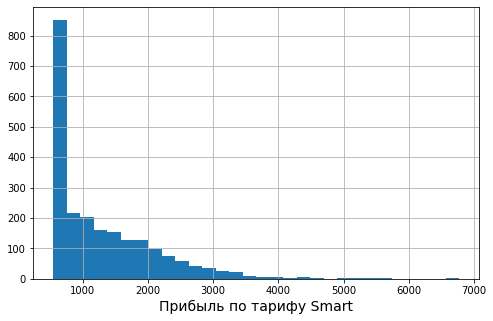

In [72]:
smart_users['month_revenue'].hist(bins = 30, figsize=(8,5))
plt.xlabel('Прибыль по тарифу Smart', size=14)
plt.show()

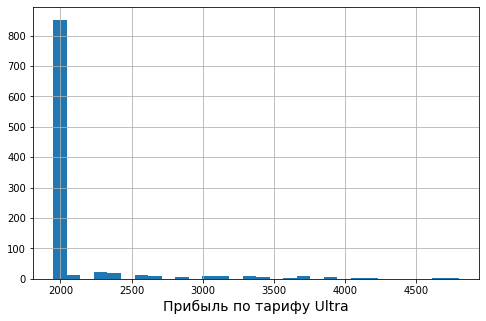

In [73]:
ultra_users['month_revenue'].hist(bins = 30, figsize=(8,5))
plt.xlabel('Прибыль по тарифу Ultra', size=14)
plt.show()

Мы видим, что абоненты тарифа smart чаще выходят за рамки тарифа. Вероятно, не хватает пакета инернета или звонков.

Посмотрим, как обстоят дела со звонками:

In [74]:
df.groupby('tariff').agg({'month_duration':['median','mean','var','std']})

month_duration                                       
               median        mean            var         std
tariff                                                      
smart           421.5  417.747534   36281.393836  190.476754
ultra           518.0  526.089249  101052.493549  317.887549

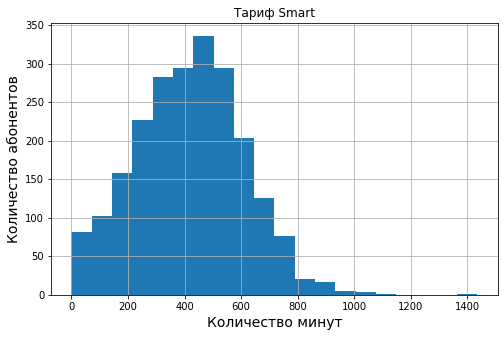

In [75]:
smart_users['month_duration'].hist(bins = 20, figsize=(8,5))
plt.title('Тариф Smart')
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество минут', size=14)
plt.show()

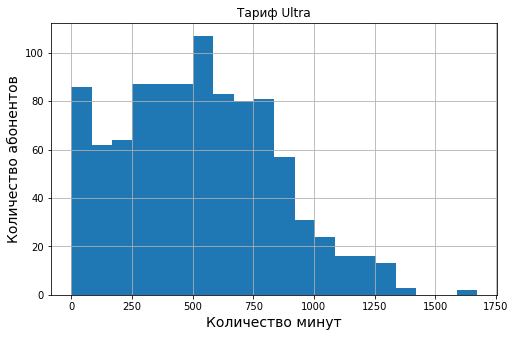

In [76]:
ultra_users['month_duration'].hist(bins = 20, figsize=(8,5))
plt.title('Тариф Ultra')
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество минут', size=14)
plt.show()

Пользователи более дешевого тарифа билже подходят к лимиту по звонкам. У пользователей тарифа ultra остается еще большой запас.

Посмотрим на выбросы тарифа smart:

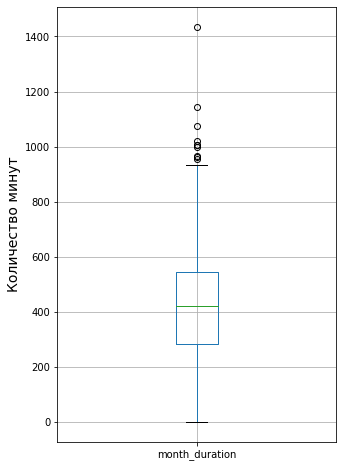

In [77]:
smart_users.boxplot(column = 'month_duration', figsize=(5,8))
plt.ylabel('Количество минут', size=14)
plt.show()

Выбросы есть, их не так много. Отфильтруем все значения, которые можно считать выбросами (среднее + 3 сигмы):

In [78]:
smart_users.query('month_duration>997')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,...,month_messages,total_gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
1096,1173,46,NaT,Красноярск,Агафья,Григорьева,2018-06-21,smart,8,1000,...,13,16,50,15,500,550,200,3,3,2250
1377,1216,74,NaT,Волгоград,Рустам,Малинин,2018-11-23,smart,12,1435,...,64,20,50,15,500,550,200,3,3,4397
1470,1229,24,NaT,Москва,Нелли,Зубкова,2018-10-29,smart,12,1022,...,6,25,50,15,500,550,200,3,3,4116
1648,1261,46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,12,1074,...,22,32,50,15,500,550,200,3,3,5672
2024,1319,70,NaT,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart,10,1005,...,48,18,50,15,500,550,200,3,3,2665
2886,1451,58,NaT,Набережные Челны,Виктория,Завьялова,2018-08-27,smart,12,1144,...,50,17,50,15,500,550,200,3,3,2882
3143,1486,35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,12,1007,...,83,38,50,15,500,550,200,3,3,6770


Всего семь значений, можно пренебречь.

In [79]:
smart_users = smart_users.query('month_duration<997')

Посмотрим на выбросы тарифа ultra:

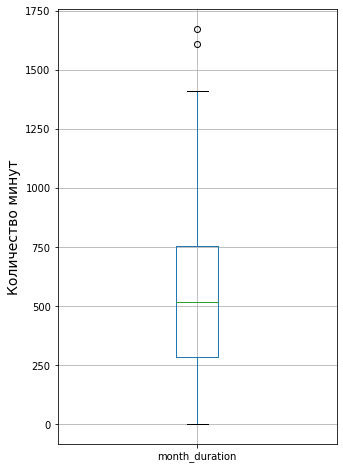

In [80]:
ultra_users.boxplot(column = 'month_duration', figsize=(5,8))
plt.ylabel('Количество минут', size=14)
plt.show()

Тут все еще проще. Также отфильтруем выбросы:

In [81]:
ultra_users = ultra_users.query('month_duration<1477')

Переходим к сообщениям:

In [82]:
df.groupby('tariff').agg({'month_messages':['median','mean','var','std']})

month_messages                                   
               median       mean          var        std
tariff                                                  
smart              28  33.369058   796.955256  28.230396
ultra              38  49.313387  2285.417425  47.806040

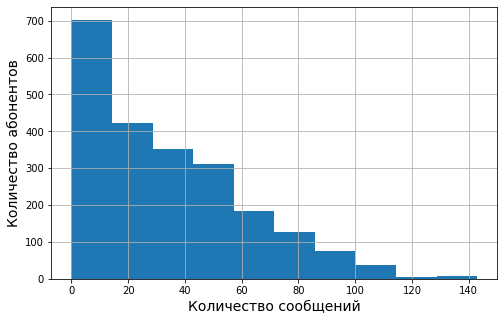

In [83]:
smart_users['month_messages'].hist(bins = 10, figsize=(8,5))
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество сообщений', size=14)
plt.show()

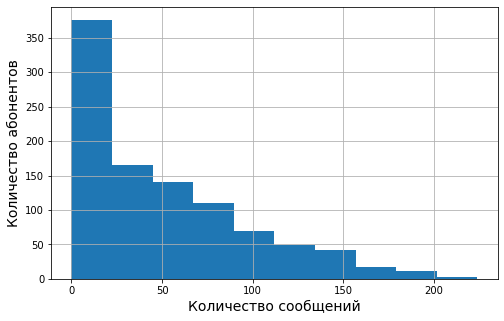

In [84]:
ultra_users['month_messages'].hist(bins = 10, figsize=(8,5))
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество сообщений', size=14)
plt.show()

Диаграммы очень похожи - основная часть абонентов редко пользуется сообщениями.

Конечно, есть и исключения, сейчас мы на них посмотрим:

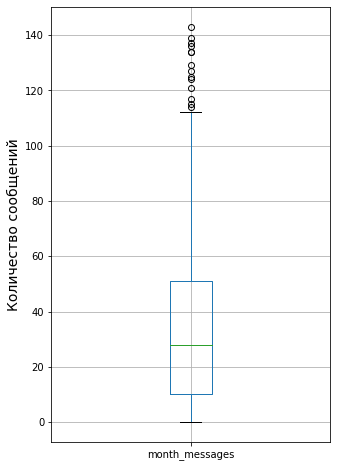

In [85]:
smart_users.boxplot(column = 'month_messages', figsize=(5,8))
plt.ylabel('Количество сообщений', size=14)
plt.show()

И отфильтруем лишнее:

In [86]:
smart_users = smart_users.query('month_messages<115')

То же самое сделаем для тарифа ultra:

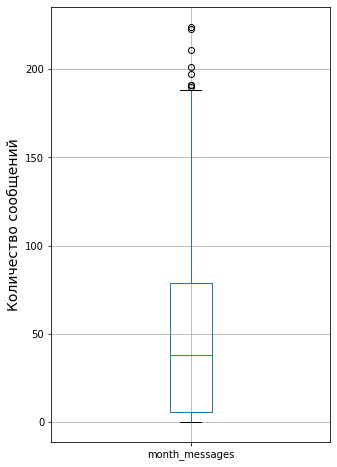

In [87]:
ultra_users.boxplot(column = 'month_messages', figsize=(5,8))
plt.ylabel('Количество сообщений', size=14)
plt.show()

In [88]:
ultra_users = ultra_users.query('month_messages<170')

Переходим к потреблению интернета:

In [89]:
df.groupby('tariff').agg({'total_gb_used':['median','mean','var','std']})

total_gb_used                                
              median       mean        var       std
tariff                                              
smart             17  16.321525  33.133453  5.756167
ultra             19  19.474645  97.378544  9.868057

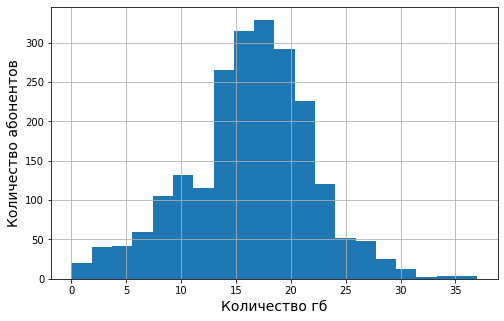

In [90]:
smart_users['total_gb_used'].hist(bins = 20, figsize=(8,5))
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество гб', size=14)
plt.show()

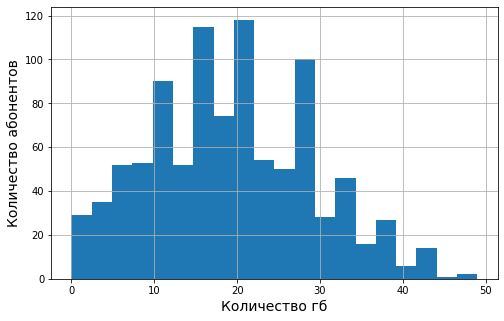

In [91]:
ultra_users['total_gb_used'].hist(bins = 20, figsize=(8,5))
plt.ylabel ('Количество абонентов', size=14)
plt.xlabel('Количество гб', size=14)
plt.show()

Пользователи тарифа smart гораздо чаще выходят за установленные лимиты. 

Смотрим на выбросы и фильтруем. Для тарифа ultra оставляем все как есть, в три сигмы укладываются все значения.

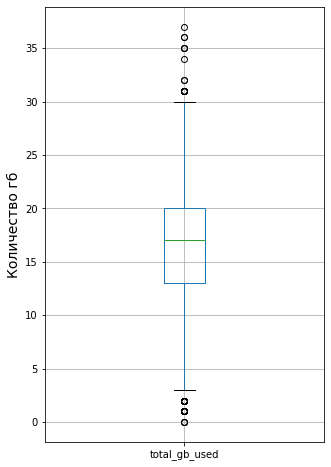

In [92]:
smart_users.boxplot(column = 'total_gb_used', figsize=(5,8))
plt.ylabel('Количество гб', size=14)
plt.show()

In [93]:
smart_users = smart_users.query('total_gb_used<32')

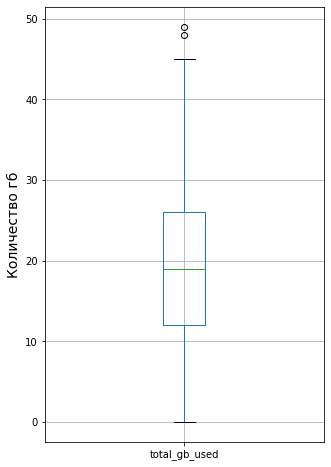

In [94]:
ultra_users.boxplot(column = 'total_gb_used', figsize=(5,8))
plt.ylabel('Количество гб', size=14)
plt.show()


### Вывод

Пользователи тарифа smart чаще выходят за пределы тарифа, особенно в потреблении интернета. Наименьшим спросом пользуются сообщения - сказывается засилье соцсетей.

## Проверка гипотез

Сформулируем гипотезы для проверки:

H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны;

H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны

Импортируем нужную библиотеку и зададим две независимые выборки по таблицам с тарифами:

In [95]:
from scipy import stats as st

In [96]:
smart = smart_users['month_revenue']

In [97]:
ultra = ultra_users['month_revenue']

In [98]:
alpha = 0.05  # пороговое значение стандартное

In [99]:
results = st.ttest_ind (smart, ultra)

In [100]:
print('p-значение: ', results.pvalue)

p-значение:  8.249342415867903e-188


In [101]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


In [102]:
print()    
print('Средняя выручка абонента тарифа smart в месяц -', smart_users['month_revenue'].mean())
print('Средняя выручка абонента тарифа ultra в месяц -', ultra_users['month_revenue'].mean())


Средняя выручка абонента тарифа smart в месяц - 1259.682417083144
Средняя выручка абонента тарифа ultra в месяц - 2064.293139293139


Нулевую гипотезу пришлось отвергнуть - средняя выручка абонентов действительно не равна в зависимости от тарифа.

Теперь посмотрим, что у нас по регионам. Формулируем гипотезы:

H₀ - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

H₁ - средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

In [103]:
df.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,month_duration,...,month_messages,total_gb_used,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,...,22,3,1000,30,3000,1950,150,1,1,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,...,60,23,1000,30,3000,1950,150,1,1,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,...,75,14,1000,30,3000,1950,150,1,1,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,...,81,14,1000,30,3000,1950,150,1,1,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,...,57,15,1000,30,3000,1950,150,1,1,1950


In [104]:
moscow = df[df['city']=='Москва']  # проводим разделение по регионам

In [105]:
province = df[df['city']!='Москва']  # проводим разделение по регионам

In [106]:
results = st.ttest_ind (moscow['month_revenue'], province['month_revenue'])

In [107]:
print('p-значение: ', results.pvalue)

p-значение:  0.5400751614511182


In [108]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


In [109]:
print()    
print('Средняя выручка абонента из Москвы в месяц -', moscow['month_revenue'].mean())
print('Средняя выручка абонента не из Москвы в месяц -', province['month_revenue'].mean())


Средняя выручка абонента из Москвы в месяц - 1546.7135842880523
Средняя выручка абонента не из Москвы в месяц - 1524.7251439539348


А вот тут все не так очевидно, абоненты по все стране приносят примерно одинаковое количество денег.

### Выводы

Проверили 2 гипотезы:

Средняя выручка абонентов тарифов равна - не подтвердилась.

Средняя выручка абонентов из Москвы равна выручке абонентов из регионов - подтвердилась.

## Итоговый вывод

В ходе анализа выяснили следующее:

- пользователи дешевого тарифа чаще выходят за рамки;
- пользователи дешевого тарифа ближе подходят к пороговым значениям;
- сообщения одинаково бесполезны в обоих тарифах, хотя есть и исключения;
- абоненты более дорогого тарифа приносят больше денег;
- средняя выручка по Москве и регионам примерно одинаковая.



Вероятно, в перспективе стоит сосредоточиться на продвижении более дорогого тарифа.